# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### Created by: 
Paz Bunis (pazbunis@gmail.com)
#### based on:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, et al., “Impact of HbA1c
Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database
Patient Records,” BioMed Research International, vol. 2014, 11 pages, 2014.

## 0. Imports and Initialization

In [204]:
from matplotlib import style as style
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as stats
from kmodes import kmodes
from sklearn.model_selection import KFold
encounters = pd.read_csv('dataset/diabetic_data.csv')
msk = np.random.rand(len(encounters)) < 0.9
encounters_train = encounters[msk]
encounters_test = encounters[~msk]

## 1. Descriptive Statistics
### 1.1. Gender vs. other attributes

#### 1.1.1. Gender vs. Age

AttributeError: 'function' object has no attribute 'bar'

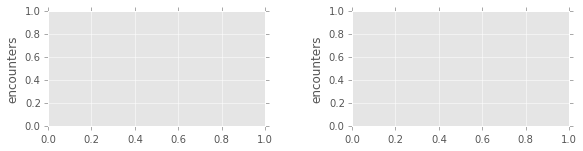

In [3]:
females_age_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('age').size()
males_age_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('age').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_age_grouping.plot.bar(ax = axs[0], title = 'Females')
males_age_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.2. Gender vs. Race

In [ ]:
females_race_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('race').size()
males_race_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('race').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_race_grouping.plot.bar(ax = axs[0], title = 'Females')
males_race_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.3. Gender vs. Readmission Value

In [ ]:
females_readmission_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('readmitted').size()
males_readmission_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('readmitted').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_readmission_grouping.plot.bar(ax = axs[0], title = 'Females')
males_readmission_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.4. Gender vs. Most Frequently Used ICD-9 Codes
(All three diagnosis types are combined to one column)

In [ ]:
fem_diags_projection = encounters_train[encounters_train.gender == 'Female'][['diag_1', 'diag_2', 'diag_3']]
fem_diags_arr = [fem_diags_projection[['diag_1']],fem_diags_projection[['diag_2']],fem_diags_projection[['diag_3']]]
fem_comb_diags = pd.concat(fem_diags_arr, axis=1).stack().reset_index(drop=True)

male_diags_projection = encounters_train[encounters_train.gender == 'Male'][['diag_1', 'diag_2', 'diag_3']]
male_diags_arr = [male_diags_projection[['diag_1']],male_diags_projection[['diag_2']],male_diags_projection[['diag_3']]]
male_comb_diags = pd.concat(male_diags_arr, axis=1).stack().reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("ICD-9 Code")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("ICD-9 Code")
fig.tight_layout(pad=4)
fem_comb_diags.value_counts().head().plot.bar(ax = axs[0], title = 'Females')
male_comb_diags.value_counts().head().plot.bar(ax = axs[1], title = 'Males', color='b')

### 1.2. Days in Hospital and A1c Test Results

#### 1.2.1. Days in Hospital vs. Gender

In [ ]:
females_hospital_time_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('time_in_hospital').size()
males_hospital_time_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('time_in_hospital').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_hospital_time_grouping.plot.bar(ax = axs[0], title = 'Females')
males_hospital_time_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.2. Days in Hospital vs. Age Group

In [ ]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('time_in_hospital').size()
group2_hospital_time = age_group2.groupby('time_in_hospital').size()
group3_hospital_time = age_group3.groupby('time_in_hospital').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

#### 1.2.3. A1c test results vs. Gender

In [ ]:
females_A1C_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('A1Cresult').size()
males_A1C_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('A1Cresult').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_A1C_grouping.plot.bar(ax = axs[0], title = 'Females')
males_A1C_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.4. A1c test results vs. Age Group

In [ ]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('A1Cresult').size()
group2_hospital_time = age_group2.groupby('A1Cresult').size()
group3_hospital_time = age_group3.groupby('A1Cresult').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

### 1.3. Other Results

In [ ]:
# TODO: add more Descriptive Statistics

## 2. Hypothesis Testing

### 2.1. Is Testing HbA1c  Associated With a Reduced Rate of Readmission?
Our null hypothesis $H_0$ is that there is no correlation between the HbA1c test and the rate of readmission.
In order to test this, we will use the Fisher exact test and the Chi-square test (which is supposed to be better for larger numbers).

In [41]:
proj = encounters_train[['A1Cresult', 'readmitted']]
ct = pd.crosstab(proj.A1Cresult, proj.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
N_readmitted_tested = ct.readmitted.All - ct.readmitted['None']
N_readmitted_not_tested = ct.readmitted['None']
N_not_readmitted_tested = ct.not_readmitted.All - ct.not_readmitted['None']
N_not_readmitted_not_tested = ct.not_readmitted['None']

print(ct)

readmitted  readmitted  not_readmitted    All
A1Cresult                                    
>7                 337            3097   3434
>8                 734            6710   7444
None              8720           67617  76337
Norm               433            4033   4466
All              10224           81457  91681


####  Fisher Exact Test 

In [ ]:
contingency_table = [[N_readmitted_tested, N_readmitted_not_tested],[N_not_readmitted_tested, N_not_readmitted_not_tested]]
odds_ratio, p_val = scipy.stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

As we see here, we get $p < 0.001$ and an odds-ratio which is significantly lower than 1, so we should reject the null hypothesis.


####  Chi-Square Test

In [ ]:
statistic, p_val, _, _ =scipy.stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

### 2.2. Is Drug Prescription or Dosage Change Associated With a Reduced Rate of Readmission? 


Our null hypothesis  $H_0$  is that there is no correlation between drug prescription or dosage change and the rate of readmission. 
As before, we use the Fisher exact test and the Chi-square test for added robustness. 

In [5]:
drug_change_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed']
drug_df = encounters_train[drug_change_columns]
indicators = drug_df.apply(lambda x: ("Up" in x) or (x.diabetesMed == "Yes"), axis=1) 
df = pd.DataFrame(data = {'prescribed_or_upped': indicators, 'readmitted': encounters_train['readmitted']})
ct = pd.crosstab(df.prescribed_or_upped, df.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
print(ct)
N_readmitted_prescribed_or_upped = ct.readmitted[True]
N_readmitted_not_prescribed_or_upped = ct.readmitted[False]
N_not_readmitted_prescribed_or_upped = ct.not_readmitted[True]
N_not_readmitted_not_prescribed_or_upped = ct.not_readmitted[False]

readmitted           readmitted  not_readmitted    All
prescribed_or_upped                                   
False                      2018           19058  21076
True                       8135           62348  70483
All                       10153           81406  91559


####  Fisher Exact Test

In [6]:
contingency_table = [[N_readmitted_prescribed_or_upped, N_readmitted_not_prescribed_or_upped],
                     [N_not_readmitted_prescribed_or_upped, N_not_readmitted_not_prescribed_or_upped]]
odds_ratio, p_val = stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

Odds ratio: 1.23222833531
P-value: 5.8275001429e-16


As we see here, we get $p < 0.001$ and an odds-ratio which is significantly higher than 1, so we should reject the null hypothesis.

####  Chi-Square Test

In [7]:
statistic, p_val, _, _ = stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

Statistic value: 63.4648847116
P-value: 1.63251172905e-15


We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

## 3.Clustering and Similarity

### 3.1. Defining a Metric 

Since we are clustreting categorical data, one logical option is using the following metric:

Let $X,Y$ be two rows of length $k$ in the data set. Assume that for all $i \in [k]$, $X_i,Y_i \in A_i$ ($A_i$ is a categorical field, for example the 'readmitted' field).

Then: $d(X,Y)= \sum_i \mathbb{1}[X_i \neq Y_i]$

A cluster centroid will be a point $C \in A_1 \times A_2 \times ... \times A_k$.

### 3.2.  Using K-Modes to Cluster Patients

K-modes is a clustering algorithm which uses the metric defined above, and is closely related to K-Means.

It uses the same type of expectation-maximization steps, but updates the centroids at each iteration by the "mode" of the categories, which is the category that has the highest count (within the cluster).

For example, if $\{X^1, X^2, X^3\}$ are one cluster with centroid $C$, then our update will be:
$$C_i=argmax_{c \in A_i} (\mathbb{1}[X^{1}_{i} = c]+ \mathbb{1}[X^{2}_{i} = c] + \mathbb{1}[X^{3}_{i} = c])$$

In [150]:
# cluster_df = pd.DataFrame({'res': encounters_train[['A1Cresult']]}, dtype="category")
diag_1 = encounters_train[['diag_1']]['diag_1'].astype("category")
diag_2 = encounters_train[['diag_2']]['diag_2'].astype("category")
diag_3 = encounters_train[['diag_3']]['diag_3'].astype("category")
A1Cres = encounters_train[['A1Cresult']]['A1Cresult'].astype("category")
readmitted = encounters_train[['readmitted']]['readmitted'].astype("category")

cols = {'diag_1': diag_1, 'diag_2': diag_2, 'diag_3': diag_3,
        'A1Cres': A1Cres, 'readmitted': readmitted}
cluster_df = pd.DataFrame(data = cols, dtype="category")
c1 = np.array(cluster_df.diag_1.cat.codes)
c2 = np.array(cluster_df.diag_2.cat.codes)
c3 = np.array(cluster_df.diag_3.cat.codes)
c4 = np.array(cluster_df.A1Cres.cat.codes)
c5 = np.array(cluster_df.readmitted.cat.codes)
t = np.matrix([c1, c2, c3, c4, c5]).transpose()
km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(t)
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8202, cost: 269334.0
Run 1, iteration: 2/100, moves: 0, cost: 269334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 14304, cost: 261216.0
Run 2, iteration: 2/100, moves: 0, cost: 261216.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 6602, cost: 260751.0
Run 3, iteration: 2/100, moves: 0, cost: 260751.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 8011, cost: 291671.0
Run 4, iteration: 2/100, moves: 1302, cost: 291671.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 26249, cost: 262704.0
Run 5, iteration: 2/100, moves: 1986, cost: 262704.0
Best run was number 3
[[271 76 85 2 2]
 [258 243 252 2 2]
 [271 258 85 2 1]
 

In [183]:
# get index<->category mappings:
A1Cres_dict = dict( enumerate(cluster_df.A1Cres.cat.categories) )
readmitted_dict = dict( enumerate(cluster_df.readmitted.cat.categories) )

In [203]:
centroids = pd.DataFrame(km.cluster_centroids_)
# if needed, convert from index back to category:
# centroids[3] = centroids[3].apply(lambda x: A1Cres_dict[x])
# centroids[4] = centroids[4].apply(lambda x: readmitted_dict[x])
print('Clusters (rows are clusters, columns are diag_1, diag_2, diag_3, A1Cresult, readmitted):')
print(centroids)
# Cluster info:
cluster_labels = pd.Series(clusters, dtype="category")
print('\nCluster sizes:')
cluster_labels.groupby(cluster_labels).count()

Clusters (rows are clusters, columns are diag_1, diag_2, diag_3, A1Cresult, readmitted):
     0    1    2     3    4
0  271   76   85  None   NO
1  258  243  252  None   NO
2  271  258   85  None  >30
3  271  131  242  None  <30

Cluster sizes:


0    47537
1     7119
2    28773
3     8195
dtype: int64

We got 4 pretty big clusters, and their centroids are described above (each row is a centroid).

## 4. Prediction

Divide the training data into 10 folds for cross-validation:

In [290]:
# reduced_train_data = encounters_train[[]]
kf = KFold(n_splits=10, shuffle=True)
folds = []
for train_idxs, test_idxs in kf.split(encounters_train):
    folds.append({'train' : encounters_train.ix[train_index], 'test': encounters_train.ix[test_idxs]})

### 4.1. Naïve Bayes
We are going to assume a uniform prior, i.e., $P(\text{Readmission}=op_i)=\frac{1}{\text{number of options}}$.

*I'm using the general $op_i$ notation in order to include both binary and ternary cases.*

#### 4.1.1. Binary Classification

In [338]:
# for fold in folds:
fold = folds[0]
train_data = fold['train']
for col_name in train_data.columns:
    if col_name != 'readmitted':
        curr_column = train_data[[col_name, 'readmitted']]
        ct = pd.crosstab(curr_column[col_name], curr_column.readmitted, margins=True)
        print(ct)

readmitted     <30    >30     NO    All
encounter_id                           
12522.0          0      0      1      1
16680.0          0      0      1      1
28236.0          0      1      0      1
35754.0          0      1      0      1
36900.0          1      0      0      1
40926.0          1      0      0      1
42570.0          0      0      1      1
55842.0          0      0      1      1
62256.0          0      1      0      1
63768.0          0      1      0      1
64410.0          0      0      1      1
73578.0          0      0      1      1
77076.0          1      0      0      1
84222.0          0      0      1      1
89682.0          0      1      0      1
149190.0         0      1      0      1
150006.0         0      0      1      1
150048.0         0      0      1      1
182796.0         0      0      1      1
183930.0         0      1      0      1
216156.0         0      0      1      1
221634.0         0      0      1      1
236316.0         0      0      1      1
